# Задание 4
по курсу

*"Введение в предсказательное моделирование"*

студентки 4-го курса группы БПМИ 131
### Кульпиной Ксении

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### 0) Описать задачу: количество, смысл и тип признаков; количество и смысл классов; число объектов (наблюдений) + любая другая элементарная информация о данных, которую можно озаглавить "знакомство с данными".

In [2]:
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
np.min(df.values[:,1:]),np.max(df.values[:,1:])

(0, 255)

In [30]:
pixels = np.sqrt(df.shape[1]-1).astype(int)
pixels

28

Исходные данные представляют из себя размеченный корпус изображений рукописных цифр размера 28 на 28 пикселей (784 пиксея на изображение). Первый стоблец отражает класс, то есть цифру от 0 до 9 (10 классов). Остальные столбцы (784) - пиксельные атрибуты, показывающие уровень насыщенности (чем больше значение атрибута, тем темнее). Пиксельные атрибуты принимают значения от 0 до 255.
Общее количество наблюдений - 42 000.

In [40]:
digits = df.ix[:,0] # классы
attributes = df.values[:,1:] # атрибуты

#### 1.1) Применить метод главных компонент для полной выборки: выписать среднее выборки, собственные числа и векторы выборочной ковариации. 

In [5]:
print("Среднее выборки: {}".format(np.mean(attributes)))

Среднее выборки: 33.408911169825075


In [6]:
matrix = np.cov(attributes.T) # ковариационная матрица

eigval, eigvec = np.linalg.eig(matrix) # собственные числа и векторы 

In [8]:
print("10 первых собственных чисел: \n {}".format(eigval[:10]))

10 первых собственных чисел: 
 [ 334780.59149447  245885.06513832  211051.62698822  184726.37342816
  168070.0015068   147773.28274113  112534.61945611   99315.43743443
   95016.01443299   80660.73018992]


In [10]:
print("Пример собственного вектора:\n {}".format(eigvec[1]))

Пример собственного вектора:
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. 

#### 1.2) Построить график кумулятивной суммы собственных чисел (доли объясненной дисперсии; упорядоченных в порядке убывания), сделать вывод о возможной размерности выборки.

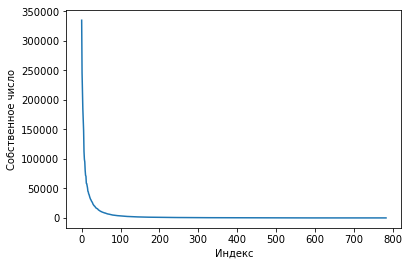

In [11]:
plt.plot(eigval)
plt.xlabel('Индекс')
plt.ylabel('Собственное число')

Доля объясненной дисперсии: (собственное число)/(сумма собственных чисел). То есть доля объясненной дисперсии растет со скоростью убывания значений собственных чисел.

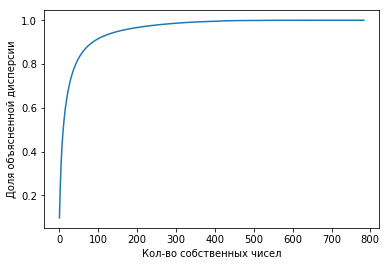

In [13]:
plt.plot(np.cumsum(eigval)/np.sum(eigval))
plt.xlabel('Кол-во собственных чисел')
plt.ylabel('Доля объясненной дисперсии')

Из графика видно, что первые 100 собственных чисел объясняют уже более 90% дисперсии, а начиная с 300-го доля объясненной дисперсии почти достигает 1. При этом нетрудно заметить, что вклад каждого следующего собственного числа, начиная с 100-го, становится все менее и менее значимым.

In [14]:
np.sum((eigval/np.sum(eigval))[:90])

0.90427269278928468

In [19]:
np.sum((eigval/np.sum(eigval))[:154])

0.95043323826337678

In [25]:
np.sum((eigval/np.sum(eigval))[:333])

0.99029909641912728

90% объясненной дисперсии - это уже хороший показатель. Поэтому для отображения изначальной матрицы достаточно брать всего 90 значений.

#### 1.3) Нарисовать собственные векторы (как изображения цифр), отвечающие наибольшим собственным числам (использовать нормировку или линейные преобразования яркости пикселей для улучшения контраста изображений). 

In [27]:
# Собственные векторы, отвечающие 3-м наибольшим собственным числам
eig_max = [eigvec[list(eigval).index(np.sort(eigval)[-1])],
           eigvec[list(eigval).index(np.sort(eigval)[-2])],
           eigvec[list(eigval).index(np.sort(eigval)[-3])]]

In [37]:
# Фунция для рисования цифр. Для улучшения конратса изображения используется нормировка яркости пикселей
def draw_image (label, figsize = pixels.astype(int), title = ''):
    image = plt.figure(figsize=(3,3))
    image = plt.imshow((np.asarray(label).reshape(figsize, figsize)/(np.sum(label).astype(float))),cmap = "Greys")
    
    plt.xticks([])
    plt.yticks([])
    plt.title(title)

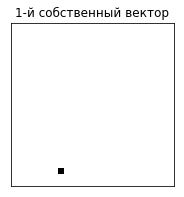

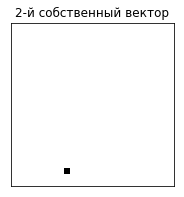

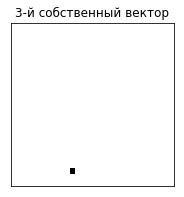

In [38]:
for i,j in enumerate(eig_max):
    draw_image(j, title = '{}-й собственный вектор'.format(i+1))

#### 1.4) Нарисовать проекции исходных цифр (избранные примеры) на подпространства главных компонент различных размерностей (объясняющих 0.9, 0.95, 0.99 дисперсии и других на выбор).

In [39]:
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [43]:
index = [27, 2727, 27000] # три случайно выбранных индекса

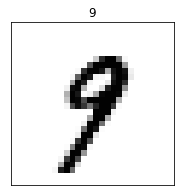

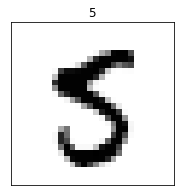

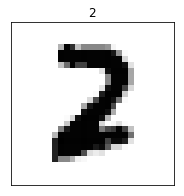

In [54]:
for i in range (0,3):
    draw_image(attributes[index[i]], title = digits[index[i]])

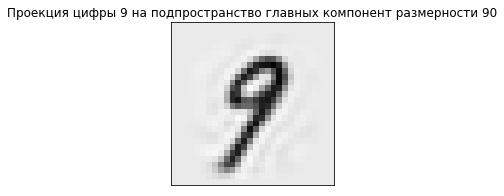

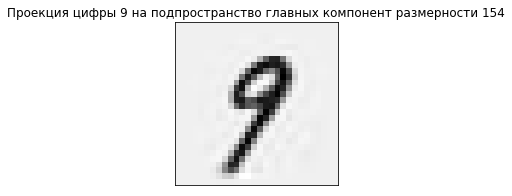

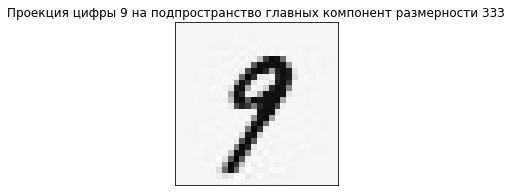

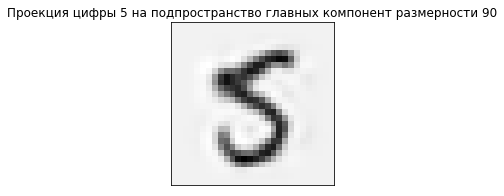

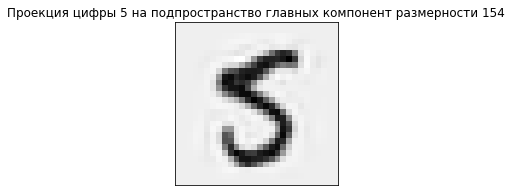

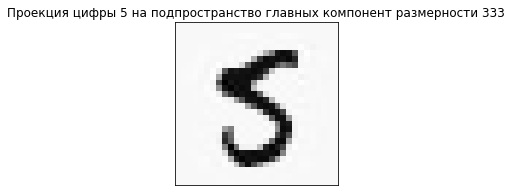

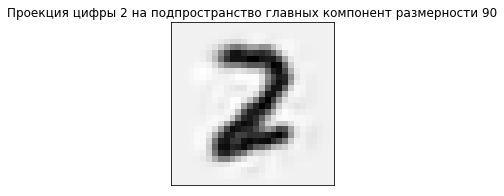

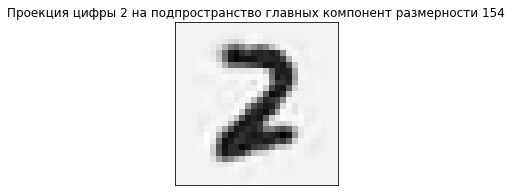

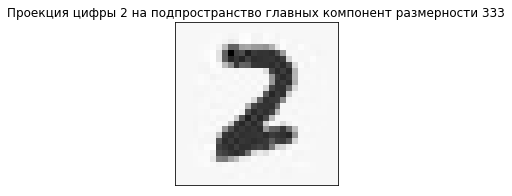

In [58]:
for i in range(0,3):
    for j in [90, 154, 333]:
        pcaf = PCA(n_components = j).fit(attributes)
        image = pcaf.inverse_transform(pcaf.transform(attributes[index[i]]))
        draw_image(image, title ='Проекция цифры {} на подпространство главных компонент размерности {}'.format(digits[index[i]],j))

#### 1.5) Сделать выводы.

Результаты показали, что даже при использовании только 90 значений (90% объясненной дисперсии) распознать исходные цифры не составляет труда. То есть метод главных компонент заметно снизил размерность без серьезных негативных последствий. Это говорит о том, что имея большие исходные данные, для решения задачи классификации достаточно взять лишь небольшую часть компонент, при этом будет объяснена существенная доля дисперсии и, самое главное, снижена размерность.

#### 2) Повторить пункт 1 для подвыборок, отвещающих  различным цифрам.


Цифра  0 

Первые 10 собственных чисел:  [ 559128.88021088  418461.19606034  254137.21468617  213191.09223936
  128140.68599373  116390.37213371   99811.2545316    89892.55201078
   75881.88761642   74770.94099327] 

Среднее выборки: 44.173989223 

Кол-во собственных чисел для объяснений 90% дисперсии: 86 

Кол-во собственных чисел для объяснения 95% дисперсии: 153 

Кол-во собственных чисел для объяснения 99% дисперсии: 330 


Цифра  1 

Первые 10 собственных чисел:  [ 509629.22749151  214364.46524857  108938.67307289   79589.64883956
   59440.81666197   41108.24722245   35711.83685611   29039.93145918
   20729.92521289   18014.33596273] 

Среднее выборки: 19.3730437094 

Кол-во собственных чисел для объяснений 90% дисперсии: 86 

Кол-во собственных чисел для объяснения 95% дисперсии: 153 

Кол-во собственных чисел для объяснения 99% дисперсии: 330 


Цифра  2 

Первые 10 собственных чисел:  [ 398924.95785954  259339.25167151  206225.31944201  171196.65405679
  166853.76238818  14237

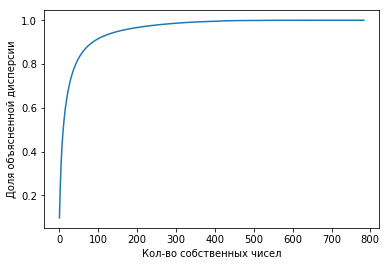

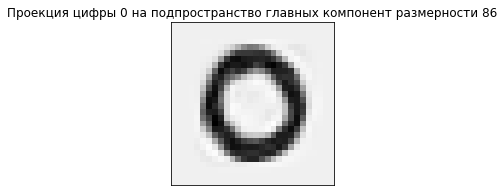

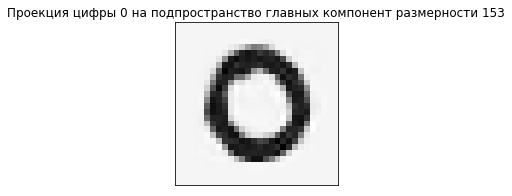

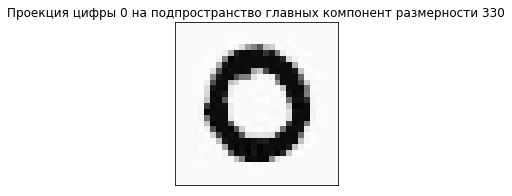

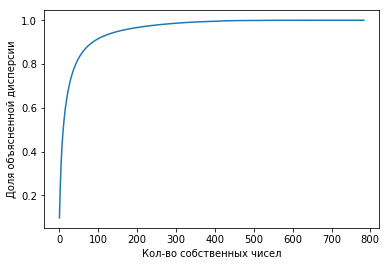

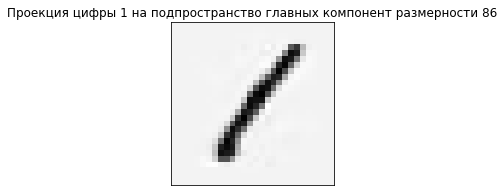

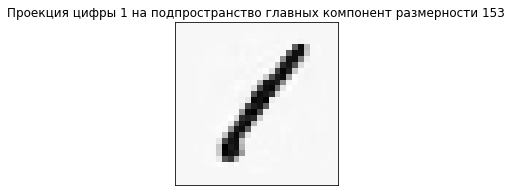

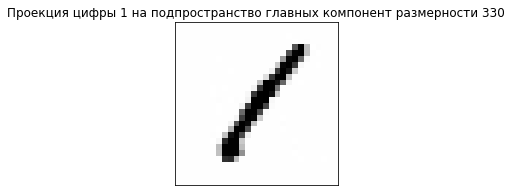

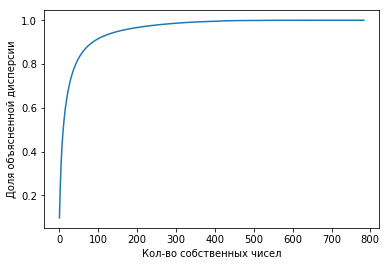

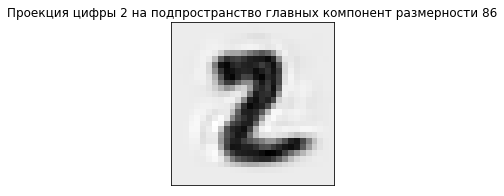

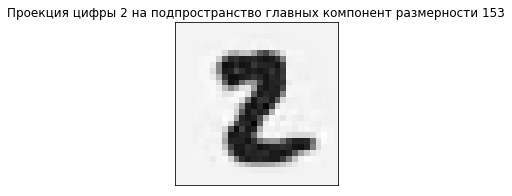

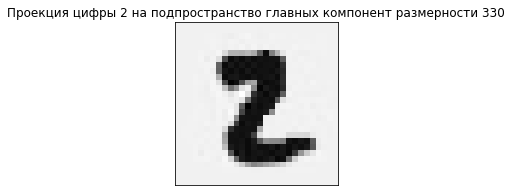

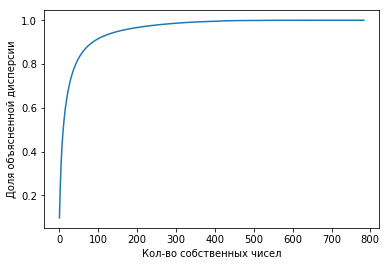

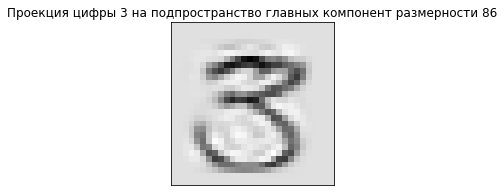

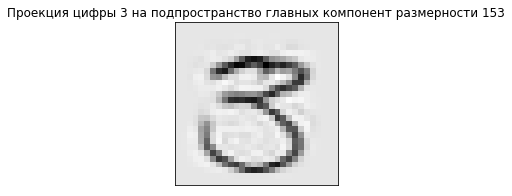

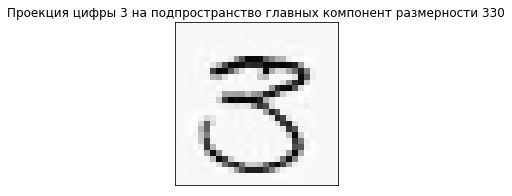

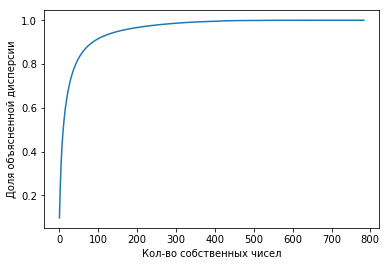

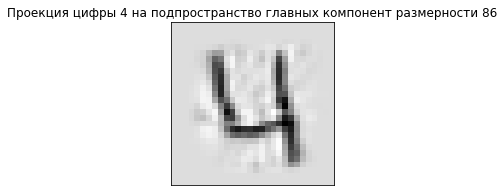

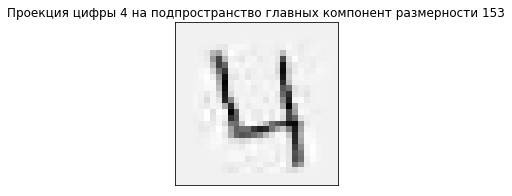

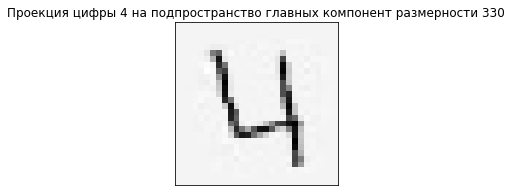

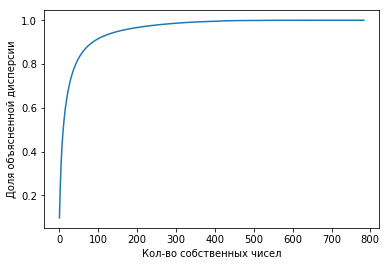

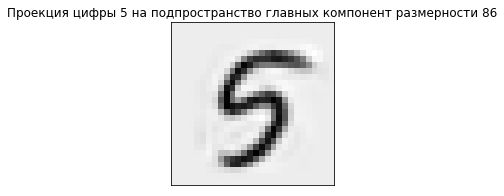

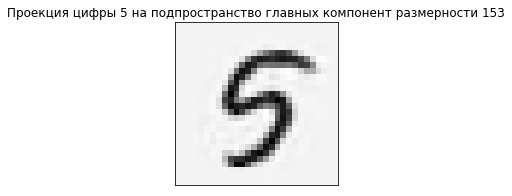

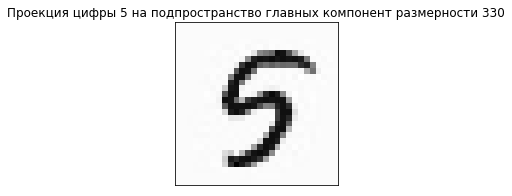

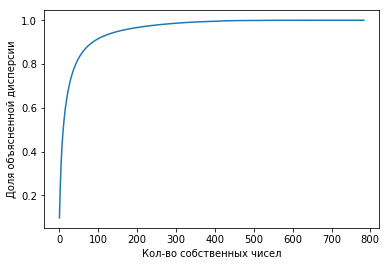

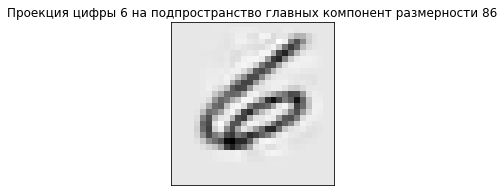

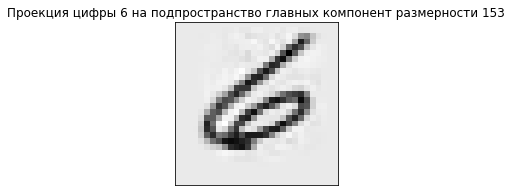

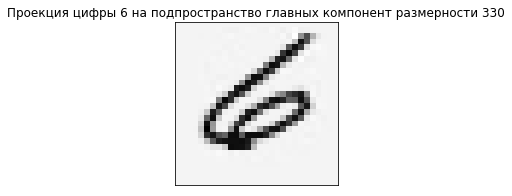

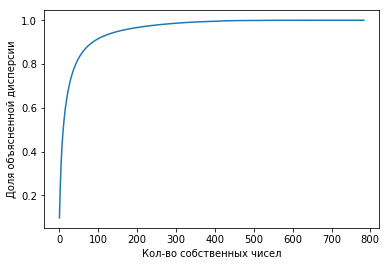

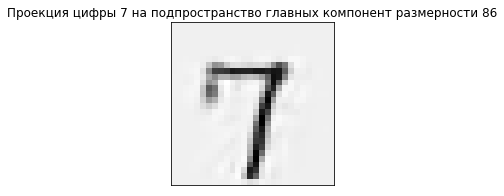

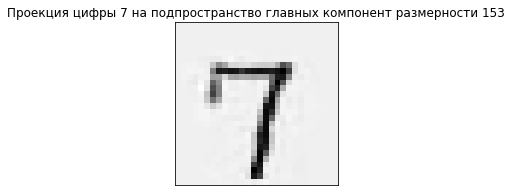

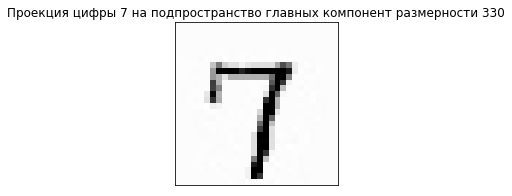

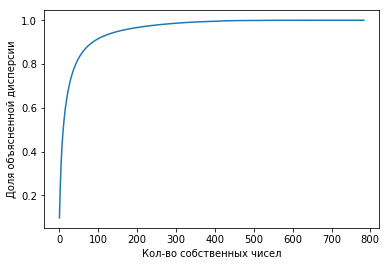

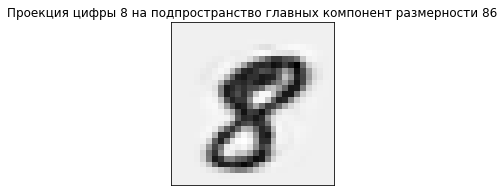

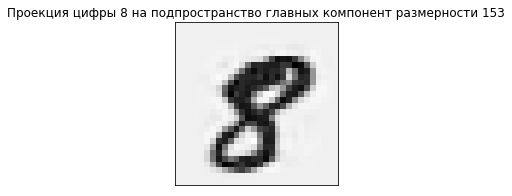

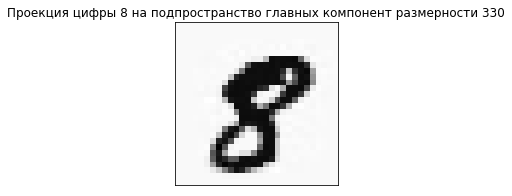

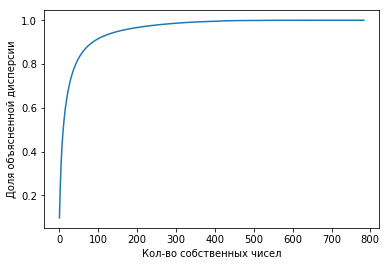

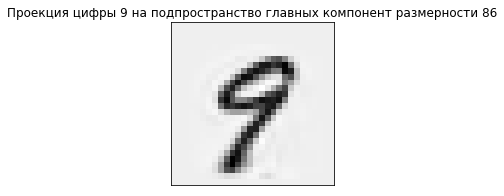

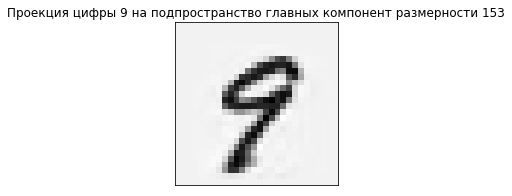

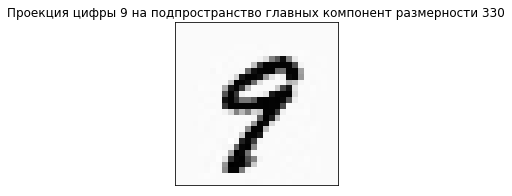

In [59]:
for i in range(0,10):
    df_new = df[df['label'] == i]
    
    attributes_new = df_new.values[:,1:]
    digits_new = df_new.ix[:,0]
    
    matrix_new = np.cov(attributes_new.T)
    eigval_new, eigvec_new = np.linalg.eig(matrix_new)
    eigval_new = eigval_new.astype(float)
    eigvec_new = eigvec_new.astype(float)
    
    print ('\nЦифра ', i,'\n')
    print ('Первые 10 собственных чисел: ',eigval_new[:10], '\n')
    print ('Среднее выборки:', np.mean(attributes_new),'\n')
    
    disp_rate = np.array(np.cumsum(eigval)/np.sum(eigval))
    rate90 = np.argwhere(disp_rate >= 0.9)[0][0]
    rate95 = np.argwhere(disp_rate >= 0.95)[0][0]
    rate99 = np.argwhere(disp_rate >= 0.99)[0][0]
    
    print ('Кол-во собственных чисел для объяснений 90% дисперсии: {}'.format(rate90),'\n')
    print ('Кол-во собственных чисел для объяснения 95% дисперсии: {}'.format(rate95),'\n')
    print ('Кол-во собственных чисел для объяснения 99% дисперсии: {}'.format(rate99),'\n')
    
    fig = plt.figure()
    fig = plt.plot(disp_rate)
    plt.xlabel('Кол-во собственных чисел')
    plt.ylabel('Доля объясненной дисперсии')
    plt.title('Цифра'.format(i))
    
    rates = [rate90, rate95, rate99]   

    for r in rates:
        pcaf = PCA(n_components = r).fit(attributes_new)
        image = pcaf.inverse_transform(pcaf.transform(attributes_new[0]))
        draw_image(image, title='Проекция цифры {} на подпространство главных компонент размерности {}'.format(i,r))


#### 3) Нарисовать цифры, получаемые как выпуклые комбинации пары цифр в исходном пространстве.

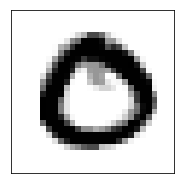

In [60]:
# Цифра 0, веса 0.5 и 0.5
draw_image(0.5*attributes[df[df['label'] == 0].index[1]] + 0.5*features[df[df['label'] == 0].index[4]])

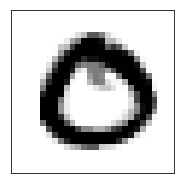

In [62]:
# Цифра 0, веса 0.4 и 0.6
draw_image(0.4*attributes[df[df['label'] == 0].index[1]] + 0.6*features[df[df['label'] == 0].index[4]])

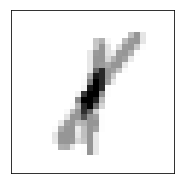

In [61]:
# Цифра 1, веса 0.5 и 0.5
draw_image(0.5*attributes[df[df['label'] == 1].index[0]] + 0.5*features[df[df['label'] == 1].index[2]])

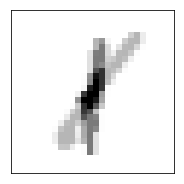

In [63]:
#Цифра 1, веса 0.4 и 0.6
draw_image(0.4*attributes[df[df['label'] == 1].index[0]] + 0.6*features[df[df['label'] == 1].index[2]])

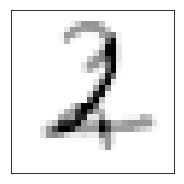

In [68]:
#Цифра 2, веса 0.5 и 0.5
draw_image(0.5*attributes[df[df['label'] == 2].index[16]] + 0.5*features[df[df['label'] == 2].index[24]])

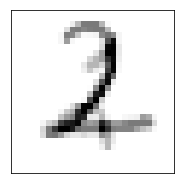

In [66]:
#Цифра 2, веса 0.4 и 0.6
draw_image(0.4*attributes[df[df['label'] == 2].index[16]] + 0.6*features[df[df['label'] == 2].index[24]])

Наиболее схожей с исходной цифрой получилась комбинация для 0. Для 1 и 2 написание не оптимально из-за того, что комбинации были построены из цифр с разным наклоном. В целом, результат, конечно же, зависит от выбора пары цифр для комбинации.

#### 3.2) Нарисовать цифры, получаемые как выпуклые комбинации пары цифр в сжатом пространстве для разных размерностей сжатия (объясняющих 0.9, 0.95, 0.99 дисперсии и других на выбор).

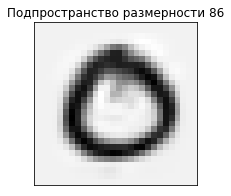

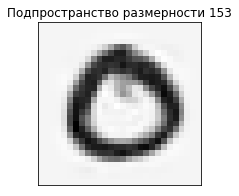

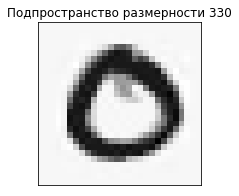

In [70]:
# Цифра 0, веса 0.5 и 0.5
for i in [86, 153, 330]:
        pcaf = PCA(n_components = i).fit(attributes)
        first = pcaf.inverse_transform(pcaf.transform(attributes[df[df['label'] == 0].index[1]]))
        second = pcaf.inverse_transform(pcaf.transform(attributes[df[df['label'] == 0].index[4]]))
        draw_image (0.5*first + 0.5*second, title='Подпространство размерности {}'.format(i))

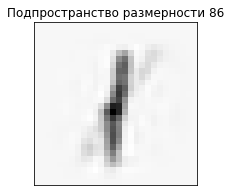

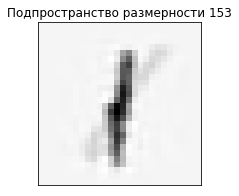

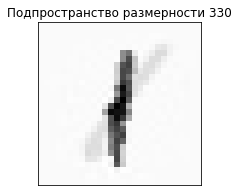

In [72]:
# Цифра 1, веса 0.2 и 0.8 (у единицы были проблемы с наклоном, поэтому одной цифре из пары был дан много больший вес)
for i in [86, 153, 330]:
        pcaf = PCA(n_components = i).fit(attributes)
        first = pcaf.inverse_transform(pcaf.transform(attributes[df[df['label'] == 1].index[0]]))
        second = pcaf.inverse_transform(pcaf.transform(attributes[df[df['label'] == 1].index[2]]))
        draw_image (0.2*first + 0.8*second, title='Подпространство размерности {}'.format(i))

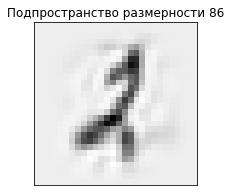

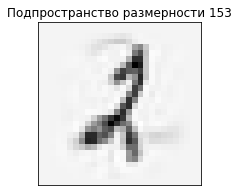

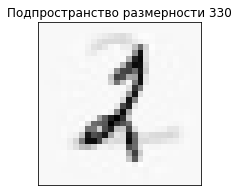

In [74]:
# Цифра 2, веса 0.2 и 0.8 (у двойки были проблемы с наклоном, поэтому одной цифре из пары был дан много больший вес)
for i in [86, 153, 330]:
        pcaf = PCA(n_components = i).fit(attributes)
        first = pcaf.inverse_transform(pcaf.transform(attributes[df[df['label'] == 2].index[24]]))
        second = pcaf.inverse_transform(pcaf.transform(attributes[df[df['label'] == 2].index[16]]))
        draw_image (0.2*first + 0.8*second, title='Подпространство размерности {}'.format(i))